In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import networkx as nx


%matplotlib inline

In [2]:
df_concelhos = pd.read_csv("concelho_info.csv",sep=",")
Pop=np.array(df_concelhos.PopTot)
Area=np.array(df_concelhos.Superficie)
ID=np.array(df_concelhos.ID)

data = {'ID':ID,'Populacao':Pop}
populacao=pd.DataFrame(data=data)
populacao.ID=populacao.ID.astype(int)

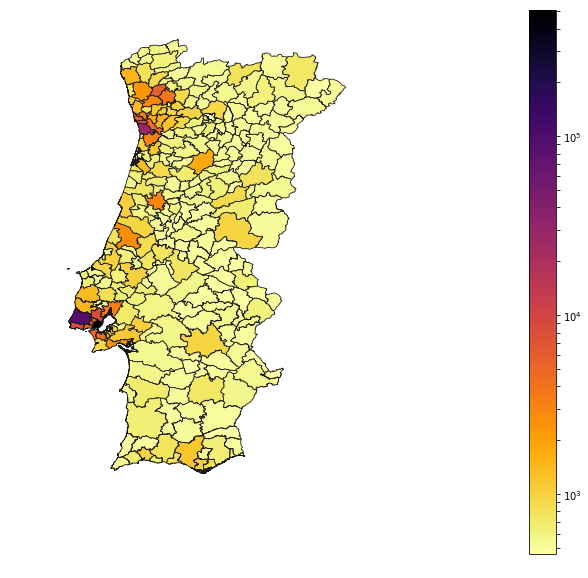

In [3]:
######### Teste Mapa

fp = "concelhos-shapefile/concelhos.shp"
map_df = gpd.read_file(fp)
map_df.CCA_2=map_df.CCA_2.astype(int)

merged = map_df.merge(populacao, how='left', left_on="CCA_2", right_on="ID")

vmin, vmax = min(populacao.Populacao), max(populacao.Populacao)
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
plt.xlim(-10,-5)
plt.ylim(36,42.5)
cmap = plt.cm.get_cmap("inferno_r")
norm = mpl.colors.SymLogNorm(0.0001, vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
fig.colorbar(sm)
merged.plot(column="Populacao", cmap=cmap, vmin=vmin,vmax=vmax, linewidth=0.8, ax=ax, edgecolor='0.1')


/home/hygor/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


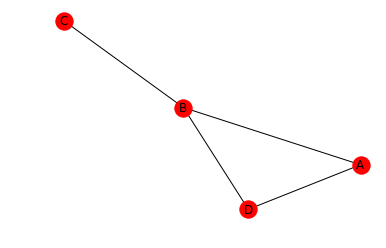

In [4]:
#Teste Rede

G = nx.Graph()
G.add_edge("A","B",weight=1.0)
G.add_edge("B","C",weight=2.0)
G.add_edge("A","D",weight=2.0)
G.add_edge("B","D",weight=2.0)
plt.axis('off')
nx.draw_networkx(G)

Modelo SEAIR
============

No modelo **SEAIR** temos que:

1. S = número de sucetíveis 
2. E = número de expostos
3. A = número de assintomáticos
4. I = número de infectados
5. R = número de recuperados

*P é População da cidade*

---

Um sucetível passa para exposto quando em contato com um assintomático (probabilidade $\beta_A$) ou em contato com um infectado (probabilidade $\beta_I$). 

Supondo que um agente entre em **contato em média com $k$** pessoas por dia, então 

1. $S(t+1)=S(t)-\Pi S(t)$
2. $E(t+1)=E(t)+\Pi S(t)-\eta E(t)$
3. $A(t+1)=A(t)+\eta E(t)-\alpha A(t)$
4. $I(t+1)=I(t)+\alpha A(t)-\mu I(t)$
5. $R(t+1)=R(t)+\mu I(t)$

Onde $\Pi$ é a probabilidade de um agente ser infectado:

$$\Pi=1-(1-\beta_I)^{k I(t)/P}(1-\beta_A)^{k A(t)/P}$$
---
---

1) Implementar uma função chamada **Epidemic_OneCity(N,k,\beta_I,\beta_A,\eta,\alpha,\mu)**, com a condição inicial: 
1. $S(0)=1.0-0.01$
2. $E(0)=0.0$
3. $A(0)=0.01$
4. $I(0)=0.0$
5. $R(0)=0.0$

Retornar a evolução temporal de $S(t)$, $E(t)+A(t)+I(t)$, e $R(t)$ e fazer uma gráfico para elas.

Como muda $E(t)+A(t)+I(t)$ para diferentes $k$?

Usar:
1. $\beta_I=0.06$
2. $\beta_A=0.06$
3. $\eta=1/2.32$
4. $\alpha=1/2.86$
5. $\mu=1/3.2$







In [5]:
def Epidemic_OneCity(N,k,beta_I,beta_A,eta,alpha,mu):
    return

Modelo SEAIR com duas cidades
============

Expandir o modelo **SEAIR** para duas cidades é necessário ter em conta a mobilidade entre elas, dado pela matrix OD:

$$ R= \begin{pmatrix} R_{00} & R_{01} \\ R_{10} & R_{11} \end{pmatrix}$$


$R_{ij}$ mede a fração da população que vai da cidade $i$ até a cidade $j$ todos os dias.

* A mobilidade promove uma **MISTURA** entre os habitantes das duas cidades.

* Todos os compartimentos e a população agora são vetores: S[0,1], E[0,1] .... N[0,1]

Cada cidade agora tem uma população efetiva:
$$P_{eff}[0]=R_{00}*P[0] + R_{10}*P[1]$$    
$$P_{eff}[1]=R_{10}*P[0] + R_{11}*P[1]$$

E o número de infectados e assintomáticos que em média uma pessoa da cidade $0$ pode encontrar é 
$$I_{eff}[0]=I[0]*R_{00}+I[1]*R_{10}$$

Logo a probabilidade de infecção é:

$$Prob[0](t)=1-(1-\beta_I)^{k I_{eff}[0](t)/P_{eff}}(1-\beta_A)^{k A_{eff}[0](t)/P_{eff}}$$
---
e finalmente:

$$\Pi[i]=\sum_j R_{ij}P_{j}$$
---

Através desse novo $\Pi_i$ podemos integrar todas as equações:

1. $S_i(t+1)=S_i(t)-\Pi_i S_i(t)$
2. $E_i(t+1)=E_i(t)+\Pi_i S_i(t)-\eta E_i(t)$
3. $A_i(t+1)=A_i(t)+\eta E_i(t)-\alpha A_i(t)$
4. $I_i(t+1)=I_i(t)+\alpha A_i(t)-\mu I_i(t)$
5. $R_i(t+1)=R_i(t)+\mu I_i(t)$






1) Usando a matrix OD

$$ R= \begin{pmatrix} 0.9 & 0.1 \\ 0.0 & 1.0 \end{pmatrix}$$,

população $P=[500000,50000]$, e $100$ **Assintomáticos** no tempo zero na primeira cidade. 

### Qual é a evolução da epidemia?



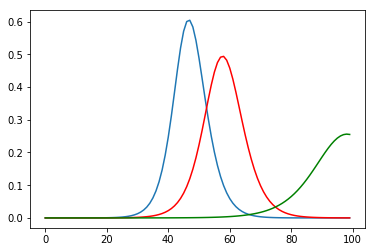

In [56]:
def SEAIR_OneCity(k):
    
    eta=1/2.32#1/5.2
    alpha=1/2.86
    mu=1/3.2
    beta_i=0.06
    beta_a=0.06
    #k=13*2

    s=1.0
    e=0
    a=10/20000000.
    i=0*10/20000000.# 0.00001
    r=0
    s_old=s
    e_old=e
    a_old=a
    i_old=i
    r_old=r


    T_max=100

    S=[]
    R=[]
    I=[]


    for t in range(T_max):R_{00}
        s = s_old - (1-((1-beta_a)**(k*a_old))*(1-beta_i)**(k*i_old))*s_old
        e = e_old + (1-((1-beta_a)**(k*a_old))*(1-beta_i)**(k*i_old))*s_old - eta*e_old
        a = a_old + eta*e_old - alpha*a     
        i = i_old + alpha*a - mu*i_old
        r = r_old + mu*i_old
        R.append(r)
        S.append(s)
        I.append(e+i+a)

        s_old=s
        e_old=e
        a_old=a
        i_old=i
        r_old=r
        
    return(I)
    #plt.yscale("log")
    

I=SEAIR(13)    
#plt.plot(np.arange(T_max),S,"-")    
plt.plot(np.arange(T_max),I,"-")    
#plt.plot(np.arange(T_max),R,"")  
I=SEAIR(10)    
plt.plot(np.arange(T_max),I,"r-")   
I=SEAIR(6)    
plt.plot(np.arange(T_max),I,"g-")


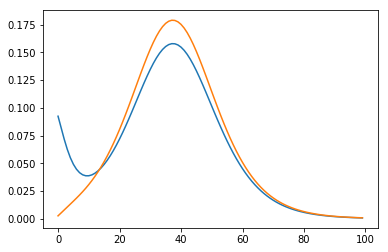

In [105]:
def SEAIR_TwoCities(k):
    
    #parametros
    eta=1/2.32#1/5.2
    alpha=1/2.86
    mu=1/3.2
    beta_i=0.06
    beta_a=0.06
    

    #mobilidade
    R=np.array([[1.0,0.0],
               [0.5,0.5]])
    
    #populacao
    P=np.array([10000,100000])
    P_eff=np.dot(R.transpose(),P)
    
    a=np.array([0.1,0.0])
    s=np.array([1.0-a[0],1.0])
    e=np.array([0.0,0.0])
    i=np.array([0.0,0.0])
    r=np.array([0.0,0.0])
    
    s_old=s
    e_old=e
    a_old=a
    i_old=i
    r_old=r


    T_max=100

    S=[]
    Rec=[]
    I_0=[]
    I_1=[]


    for t in range(T_max):
        
        
        i_eff=np.dot(R.transpose(),P*i_old)/P_eff
        a_eff=np.dot(R.transpose(),P*a_old)/P_eff

        Prob=1-((1-beta_a)**(k*a_eff))*((1-beta_i)**(k*i_eff))
        
        PI=np.dot(R,Prob)
        #print(a_eff,PI)

        s = s_old - PI*s_old# (1-((1-beta_a)**(k*a_old))*(1-beta_i)**(k*i_old))*s_old
        e = e_old + PI*s_old- eta*e_old#(1-((1-beta_a)**(k*a_old))*(1-beta_i)**(k*i_old))*s_old - eta*e_old
        a = a_old + eta*e_old - alpha*a_old     
        i = i_old + alpha*a - mu*i_old
        r = r_old + mu*i_old
        Rec.append(r[0])
        S.append(s[0])
        I_0.append(e[0]+i[0]+a[0])
        I_1.append(e[1]+i[1]+a[1])

        s_old=s
        e_old=e
        a_old=a
        i_old=i
        r_old=r
        
    return(I_0,I_1)
    #plt.yscale("log")
    

I_0,I_1=SEAIR_TwoCities(5)    
#plt.plot(np.arange(T_max),S,"-")    
plt.plot(np.arange(T_max),I_0,"-")    
plt.plot(np.arange(T_max),I_1,"-")    
#plt.plot(np.arange(T_max),R,"")  


In [60]:
R=np.array([[0.9,0.1],
            [0.0,1.0]])
P=np.array([10000,1000])

np.dot(R.transpose(),P)

array([9000., 2000.])